# Intro

In this notebook, I read all the result files from each competitor method to create a summary figure.
The metrics I use are RMSE and Pearson correlation on the expression and log2FC.
The experiments I perform comparisons on are: None stimulated, All stimulated, cell-type specific stimulation

In [1]:
# general imports
import warnings
import numpy as np
from scipy.stats import spearmanr, pearsonr, ttest_ind, wilcoxon


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# programming stuff
import time
import os
import pickle
from pathlib import Path

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from buddi.preprocessing import sc_preprocess
from buddi.plotting import validation_plotting as vp


2024-10-03 15:48:56.808459: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 15:48:56.870061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 15:48:57.255241: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 15:48:57.257293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-03 15:48:58.043340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [70]:
## parameters
sc_aug_data_path = f"{os.getcwd()}/../../data/single_cell_data/augmented_sciplex_data/"
res_data_path = f"{os.getcwd()}/../../results/single_cell_data/buddiM2_sciplex/"

cibersort_genes_path = (f"{os.getcwd()}/../../data/single_cell_data/cibersort_sciplex/" +
                        "CIBERSORTx_Job67_test_cybersort_sig_inferred_phenoclasses" +
                        ".CIBERSORTx_Job67_test_cybersort_sig_inferred_refsample.bm.K999.txt")


num_genes = 7000

exp_id = "all-sciplex"
curr_treatment = "MCF7"
res_id = f"{curr_treatment}-sciplex"




In [76]:
pca_df

,log2FC,source,Y_max,perturbation,method
0,2599,proj,K562,"Fedratinib (SAR302503, TG101348)_A549",PCA
1,0,real,K562,"Fedratinib (SAR302503, TG101348)_A549",PCA
2,1778,proj,MCF7,"Fedratinib (SAR302503, TG101348)_A549",PCA
3,0,real,MCF7,"Fedratinib (SAR302503, TG101348)_A549",PCA
4,1216,proj,K562,Tanespimycin (17-AAG)_A549,PCA
5,0,real,K562,Tanespimycin (17-AAG)_A549,PCA
6,760,proj,MCF7,Tanespimycin (17-AAG)_A549,PCA
7,0,real,MCF7,Tanespimycin (17-AAG)_A549,PCA
8,4510,proj,K562,Trametinib (GSK1120212)_A549,PCA
9,1,real,K562,Trametinib (GSK1120212)_A549,PCA


In [98]:

all_Y = ["MCF7", "K562", "A549"]
all_df = None
for curr_y in all_Y:
    print(curr_y)

    # get the 10 PRAUC
    buddi_file = os.path.join(res_data_path, f"{curr_y}-sciplex_10_prauc.csv")
    pca_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/PCA_sciplex/", f"{curr_y}-sciplex_10_PCA_prauc.csv")
    cvae_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/CVAE_sciplex/", f"{curr_y}-sciplex_10_CVAE_prauc.csv")
    bp_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/bp_sciplex/", f"{curr_y}-sciplex_10_BP_prauc.csv")

    buddi_df = pd.read_csv(buddi_file, sep=",")
    pca_df = pd.read_csv(pca_file, sep=",")
    cvae_df = pd.read_csv(cvae_file, sep=",")
    bp_df = pd.read_csv(bp_file, sep=",")

    buddi_df = buddi_df.iloc[np.where(buddi_df.method != "random")[0]]
    pca_df = pca_df.iloc[np.where(pca_df.method != "random")[0]]
    cvae_df = cvae_df.iloc[np.where(cvae_df.method != "random")[0]]
    bp_df = bp_df.iloc[np.where(bp_df.method != "random")[0]]


    # format the corr
    buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
    pca_df["method"] = ["PCA"]*pca_df.shape[0]
    cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]
    bp_df["method"] = ["BayesPrism"]*bp_df.shape[0]

    plot_df_10 = pd.concat([buddi_df, pca_df, cvae_df, bp_df])

    #########################
    # get the 50 prAUC
    #########################
    buddi_file = os.path.join(res_data_path, f"{curr_y}-sciplex_50_prauc.csv")
    pca_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/PCA_sciplex/", f"{curr_y}-sciplex_50_PCA_prauc.csv")
    cvae_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/CVAE_sciplex/", f"{curr_y}-sciplex_50_CVAE_prauc.csv")
    bp_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/bp_sciplex/", f"{curr_y}-sciplex_50_BP_prauc.csv")

    buddi_df = pd.read_csv(buddi_file, sep=",")
    pca_df = pd.read_csv(pca_file, sep=",")
    cvae_df = pd.read_csv(cvae_file, sep=",")
    bp_df = pd.read_csv(bp_file, sep=",")


    buddi_df = buddi_df.iloc[np.where(buddi_df.method != "random")[0]]
    pca_df = pca_df.iloc[np.where(pca_df.method != "random")[0]]
    cvae_df = cvae_df.iloc[np.where(cvae_df.method != "random")[0]]
    bp_df = bp_df.iloc[np.where(bp_df.method != "random")[0]]

    # format the corr
    buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
    pca_df["method"] = ["PCA"]*pca_df.shape[0]
    cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]
    bp_df["method"] = ["BayesPrism"]*bp_df.shape[0]

    plot_df_50 = pd.concat([buddi_df, pca_df, cvae_df, bp_df])

    #########################
    #get the PRAUC
    #########################
    buddi_file = os.path.join(res_data_path, f"{curr_y}-sciplex_log2fc_null.csv")
    pca_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/PCA_sciplex/", f"{curr_y}-sciplex_PCA_log2fc_null.csv")
    cvae_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/CVAE_sciplex/", f"{curr_y}-sciplex_CVAE_log2fc_null.csv")
    bp_file = os.path.join(f"{os.getcwd()}/../../results/single_cell_data/bp_sciplex/", f"{curr_y}-sciplex_BP_log2fc_null.csv")

    buddi_df = pd.read_csv(buddi_file, sep=",")
    pca_df = pd.read_csv(pca_file, sep=",")
    cvae_df = pd.read_csv(cvae_file, sep=",")
    bp_df = pd.read_csv(bp_file, sep=",")


    # format the corr
    buddi_df["method"] = ["BuDDI"]*buddi_df.shape[0]
    pca_df["method"] = ["PCA"]*pca_df.shape[0]
    cvae_df["method"] = ["CVAE"]*cvae_df.shape[0]
    bp_df["method"] = ["BayesPrism"]*bp_df.shape[0]

    plot_df_null = pd.concat([buddi_df, pca_df, cvae_df, bp_df])
    plot_df_null = plot_df_null[plot_df_null.source == "proj"]

    plot_df_null = plot_df_null.rename(columns={"log2FC":"scores", "cell_type":"Y_max"})
    plot_df_null["scores"] = plot_df_null["scores"]/(plot_df_null["scores"] + 7000)
    plot_df_null["num_top"] = "NA"
    plot_df_null["metric"] = "FPR"


    # put it together
    column_interest = ["scores", "perturbation", "method", "metric", "num_top"]
    plot_df = pd.concat([plot_df_10[column_interest], 
                        plot_df_50[column_interest], 
                        plot_df_null[column_interest]])
    
    plot_df["CellTypePerturbed"] = curr_y
    print(curr_y)

    plot_df['perturbation'] = plot_df['perturbation'].str.replace(f"_{curr_y}", '', regex=False)

        
    if all_df is None:
        all_df = plot_df
    else:    
        all_df = pd.concat([all_df, plot_df])




MCF7
MCF7
K562
K562
A549
A549


In [99]:
all_df

,scores,perturbation,method,metric,num_top,CellTypePerturbed
0,0.222372,"Fedratinib (SAR302503, TG101348)",BuDDI,avg_pr,10,MCF7
2,0.375999,Tanespimycin (17-AAG),BuDDI,avg_pr,10,MCF7
4,0.293605,Trametinib (GSK1120212),BuDDI,avg_pr,10,MCF7
6,0.536486,Triamcinolone Acetonide,BuDDI,avg_pr,10,MCF7
8,0.869960,Trichostatin A (TSA),BuDDI,avg_pr,10,MCF7
...,...,...,...,...,...,...
10,0.000000,Trametinib (GSK1120212),BayesPrism,FPR,NA,A549
12,0.000000,Triamcinolone Acetonide,BayesPrism,FPR,NA,A549
14,0.000000,Triamcinolone Acetonide,BayesPrism,FPR,NA,A549
16,0.000000,Trichostatin A (TSA),BayesPrism,FPR,NA,A549


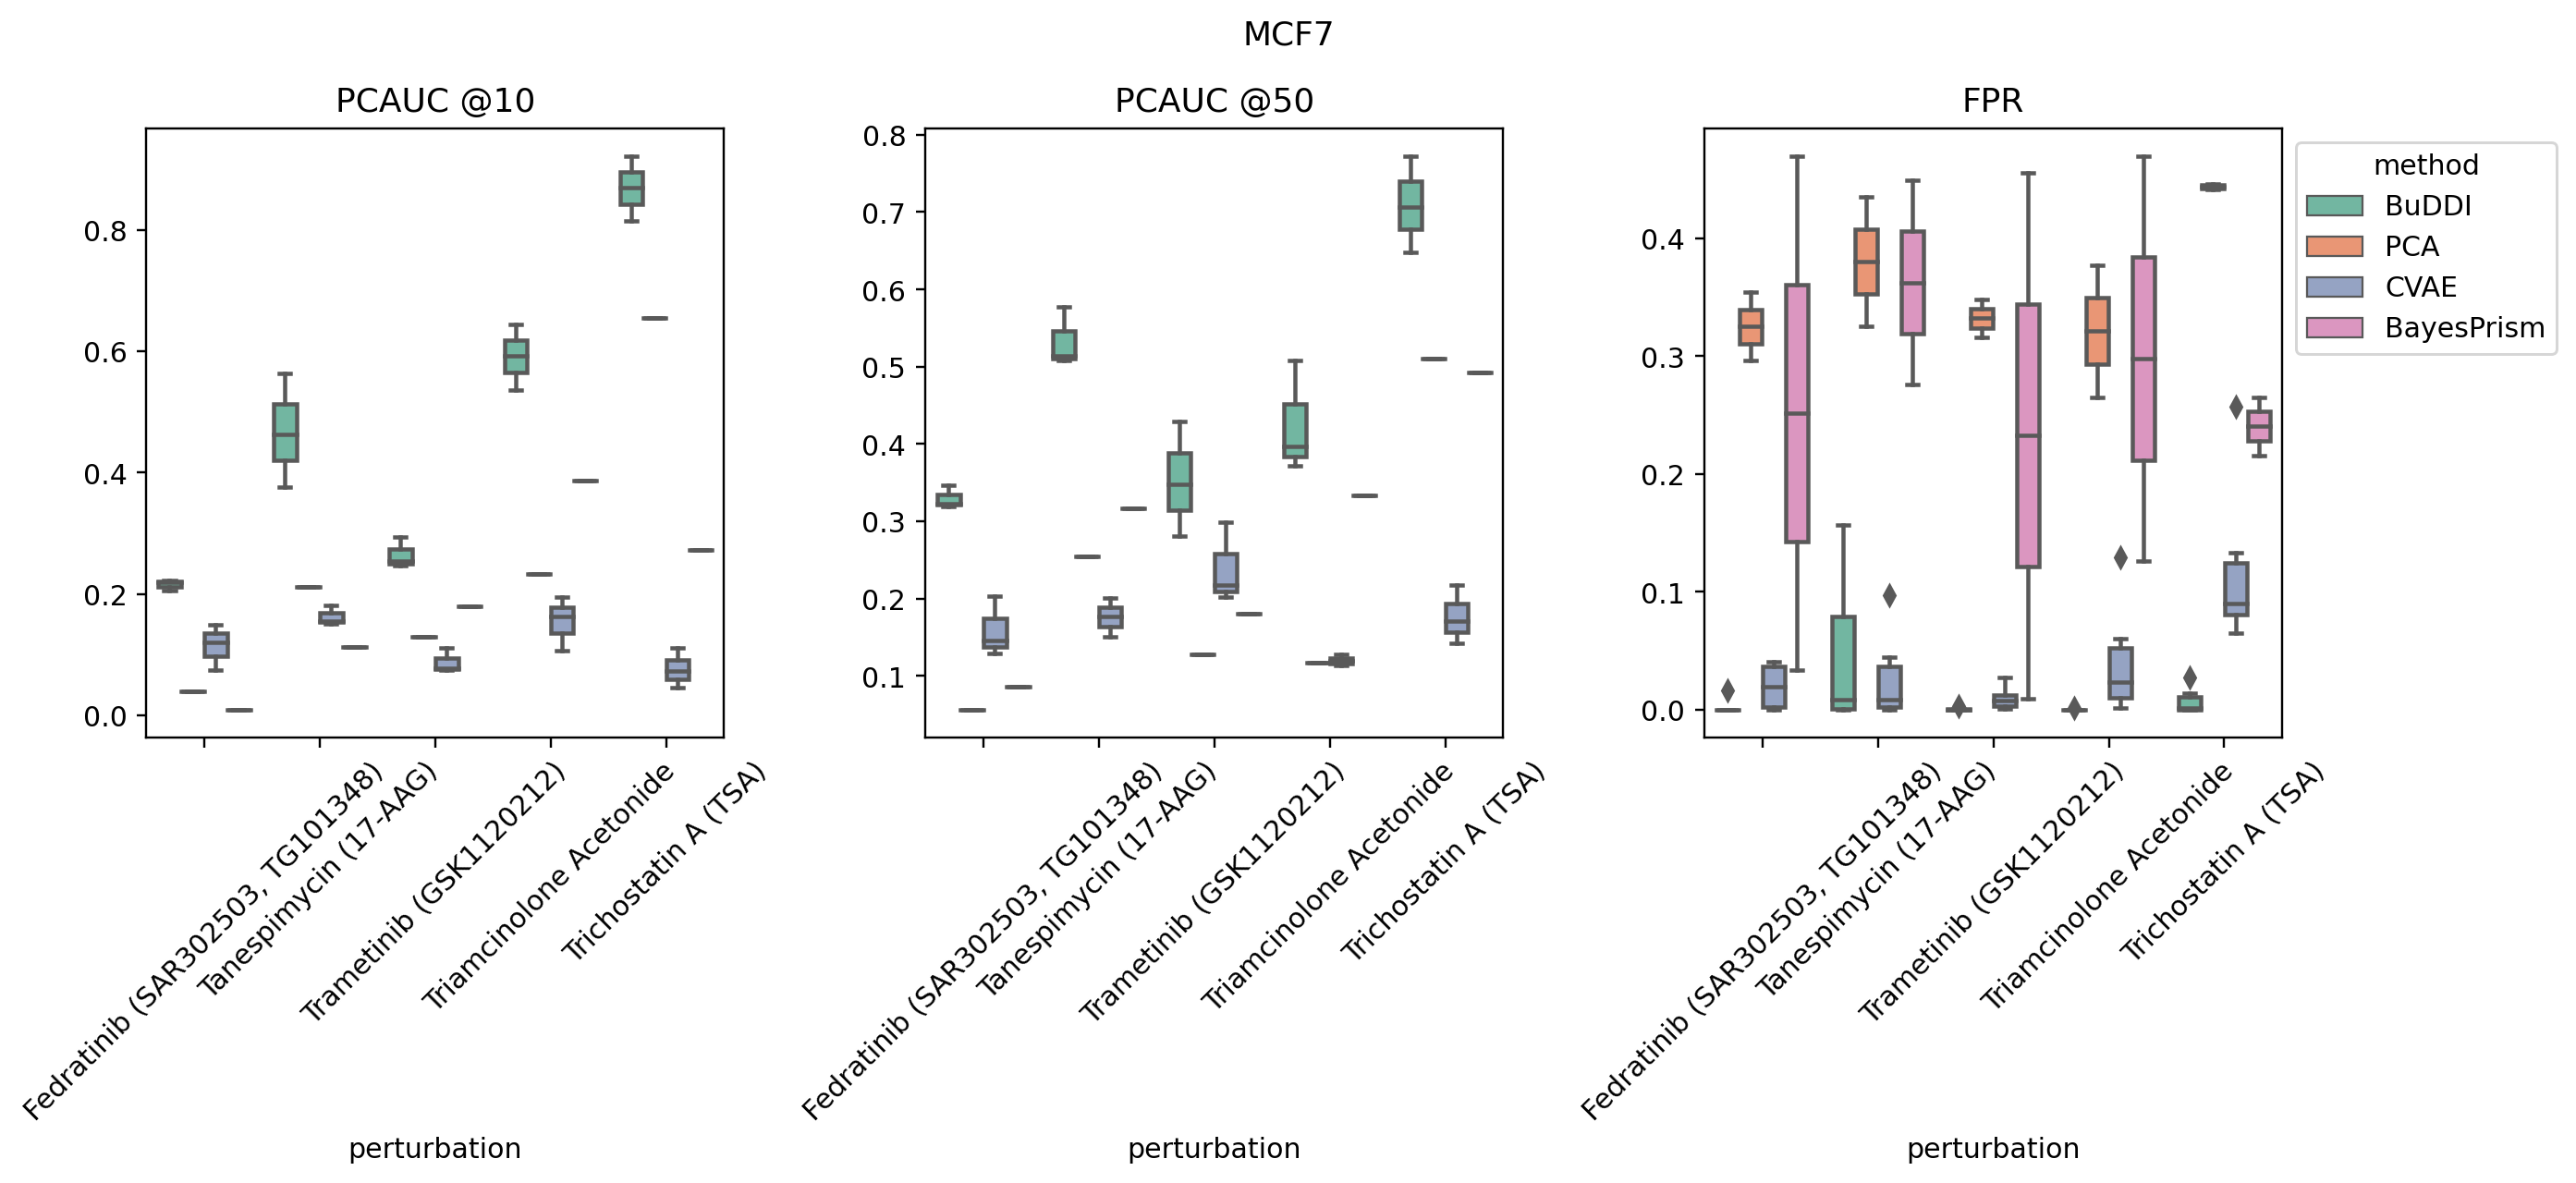

In [108]:
curr_plot_df = all_df.iloc[np.where(all_df.CellTypePerturbed == "MCF7")[0]]

# plot
fig, axs = plt.subplots(1, 3, figsize=(13,6), dpi=216)

sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 10))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[0])
axs[0].set_title("PCAUC @10")
axs[0].set(ylabel="PRAUC")
axs[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 50))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[1])
axs[1].set_title("PCAUC @50")
axs[1].set(ylabel="PRAUC")
axs[1].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where(curr_plot_df.metric == "FPR")[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[2])
axs[2].set_title("FPR")
axs[2].set(ylabel="FPR")
axs[2].tick_params(axis='x', rotation=45)



axs[0].get_legend().remove()
axs[1].get_legend().remove()
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1, 1))


y_axis = axs[0].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[1].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[2].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

fig.suptitle('MCF7') 
fig.show()
fig.tight_layout()



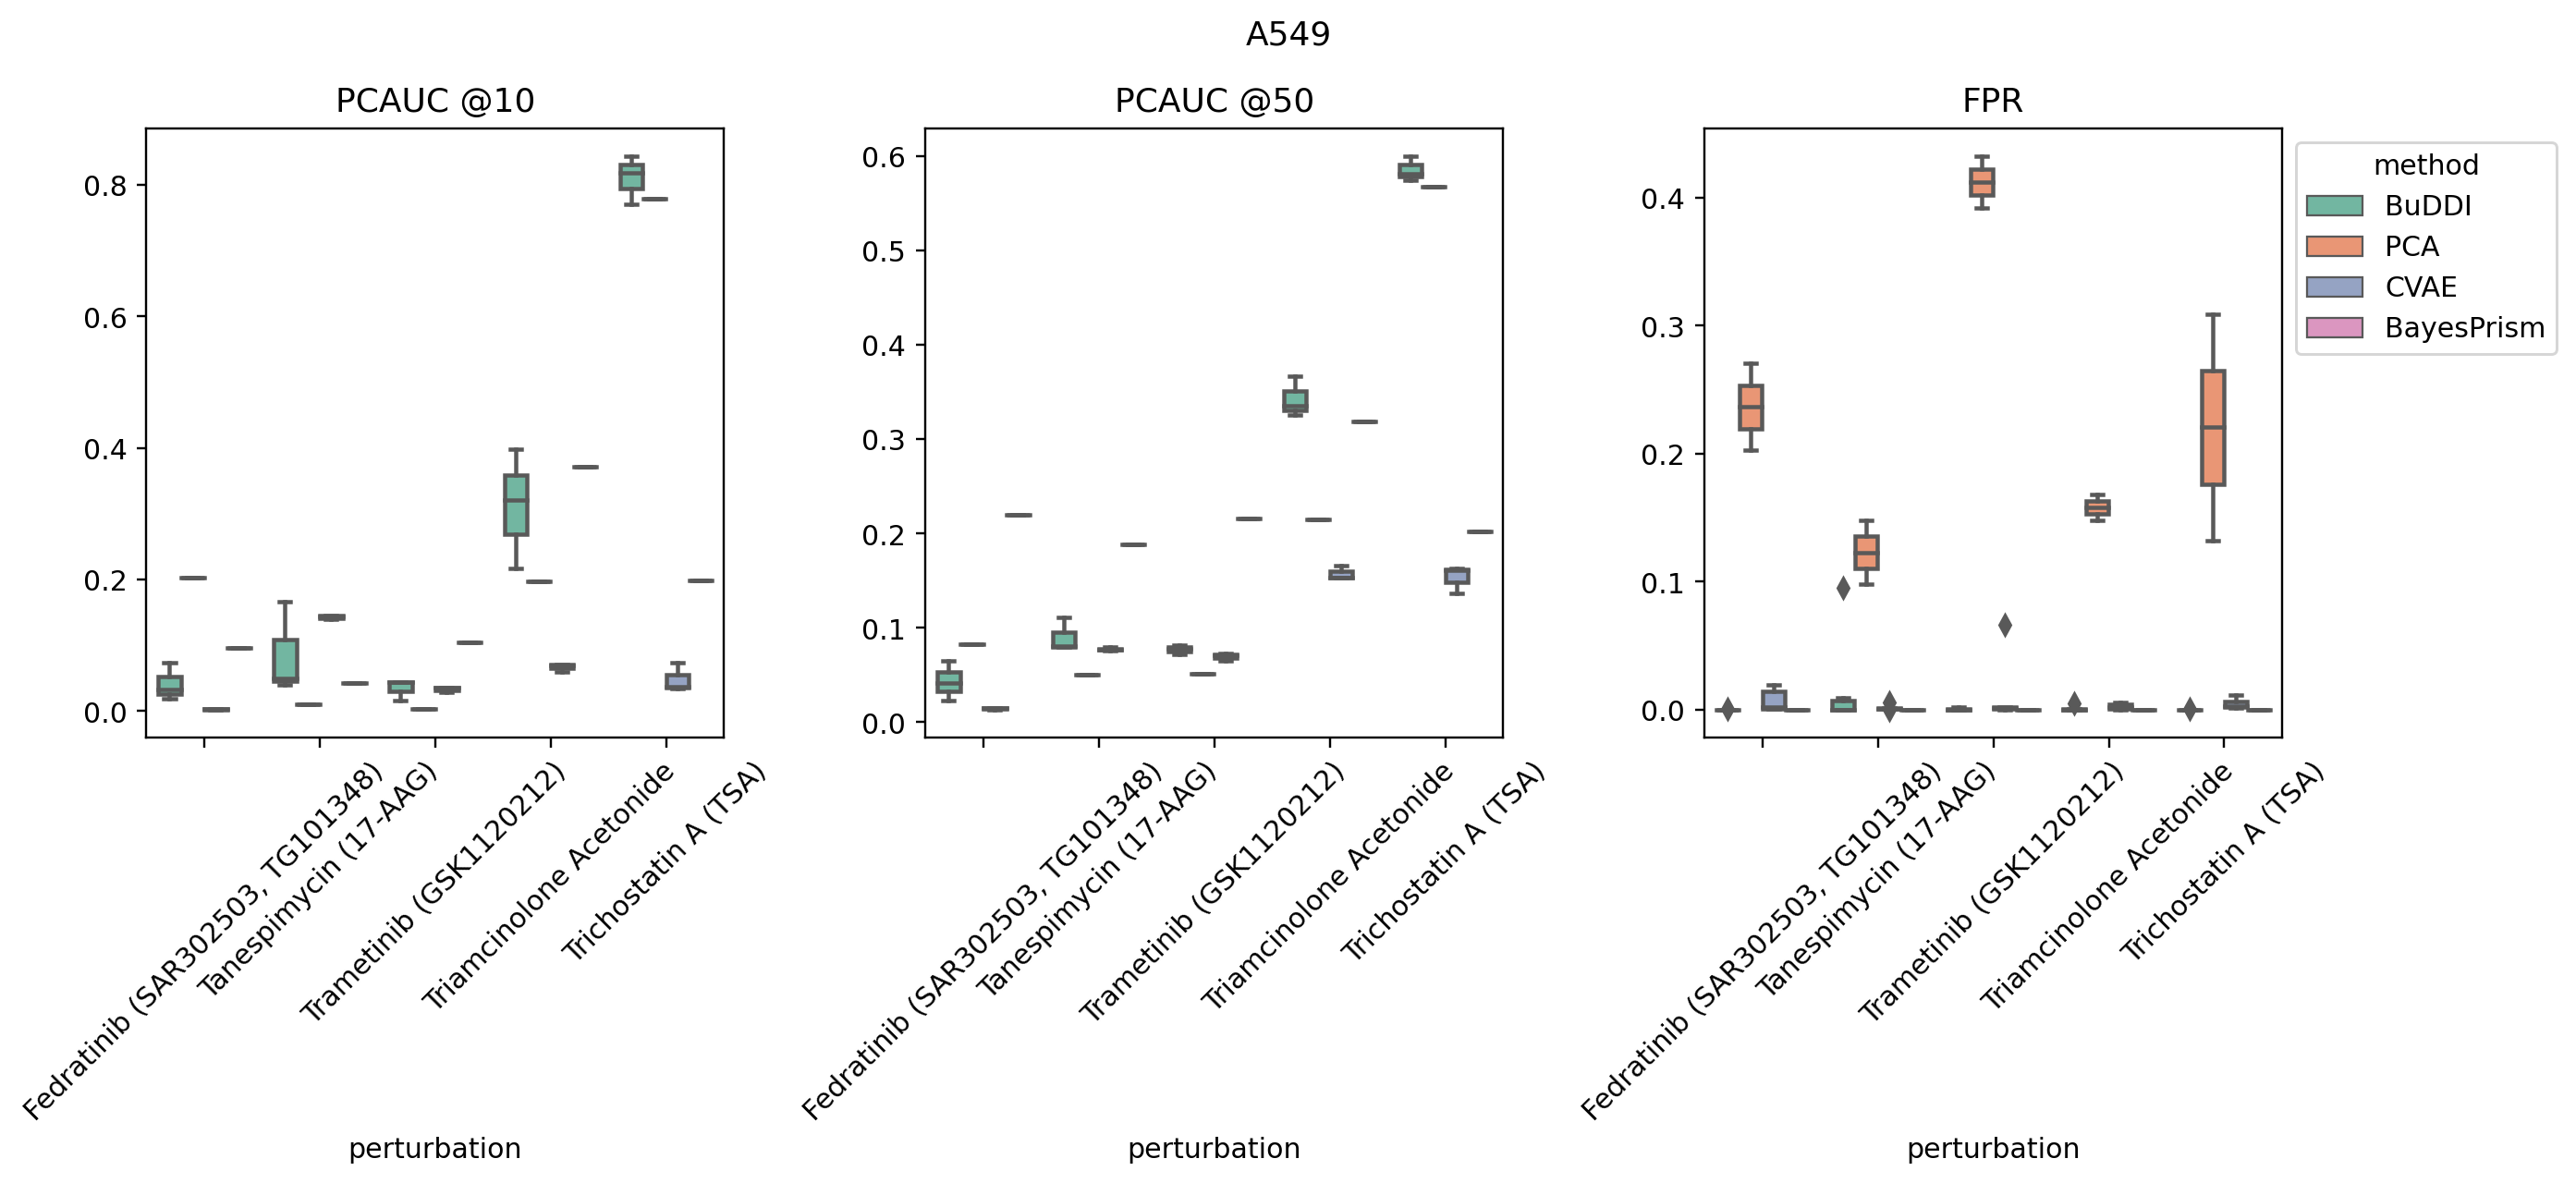

In [109]:
curr_plot_df = all_df.iloc[np.where(all_df.CellTypePerturbed == "A549")[0]]

# plot
fig, axs = plt.subplots(1, 3, figsize=(13,6), dpi=216)

sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 10))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[0])
axs[0].set_title("PCAUC @10")
axs[0].set(ylabel="PRAUC")
axs[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 50))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[1])
axs[1].set_title("PCAUC @50")
axs[1].set(ylabel="PRAUC")
axs[1].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where(curr_plot_df.metric == "FPR")[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[2])
axs[2].set_title("FPR")
axs[2].set(ylabel="FPR")
axs[2].tick_params(axis='x', rotation=45)



axs[0].get_legend().remove()
axs[1].get_legend().remove()
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1, 1))


y_axis = axs[0].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[1].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[2].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

fig.suptitle('A549') 
fig.show()
fig.tight_layout()



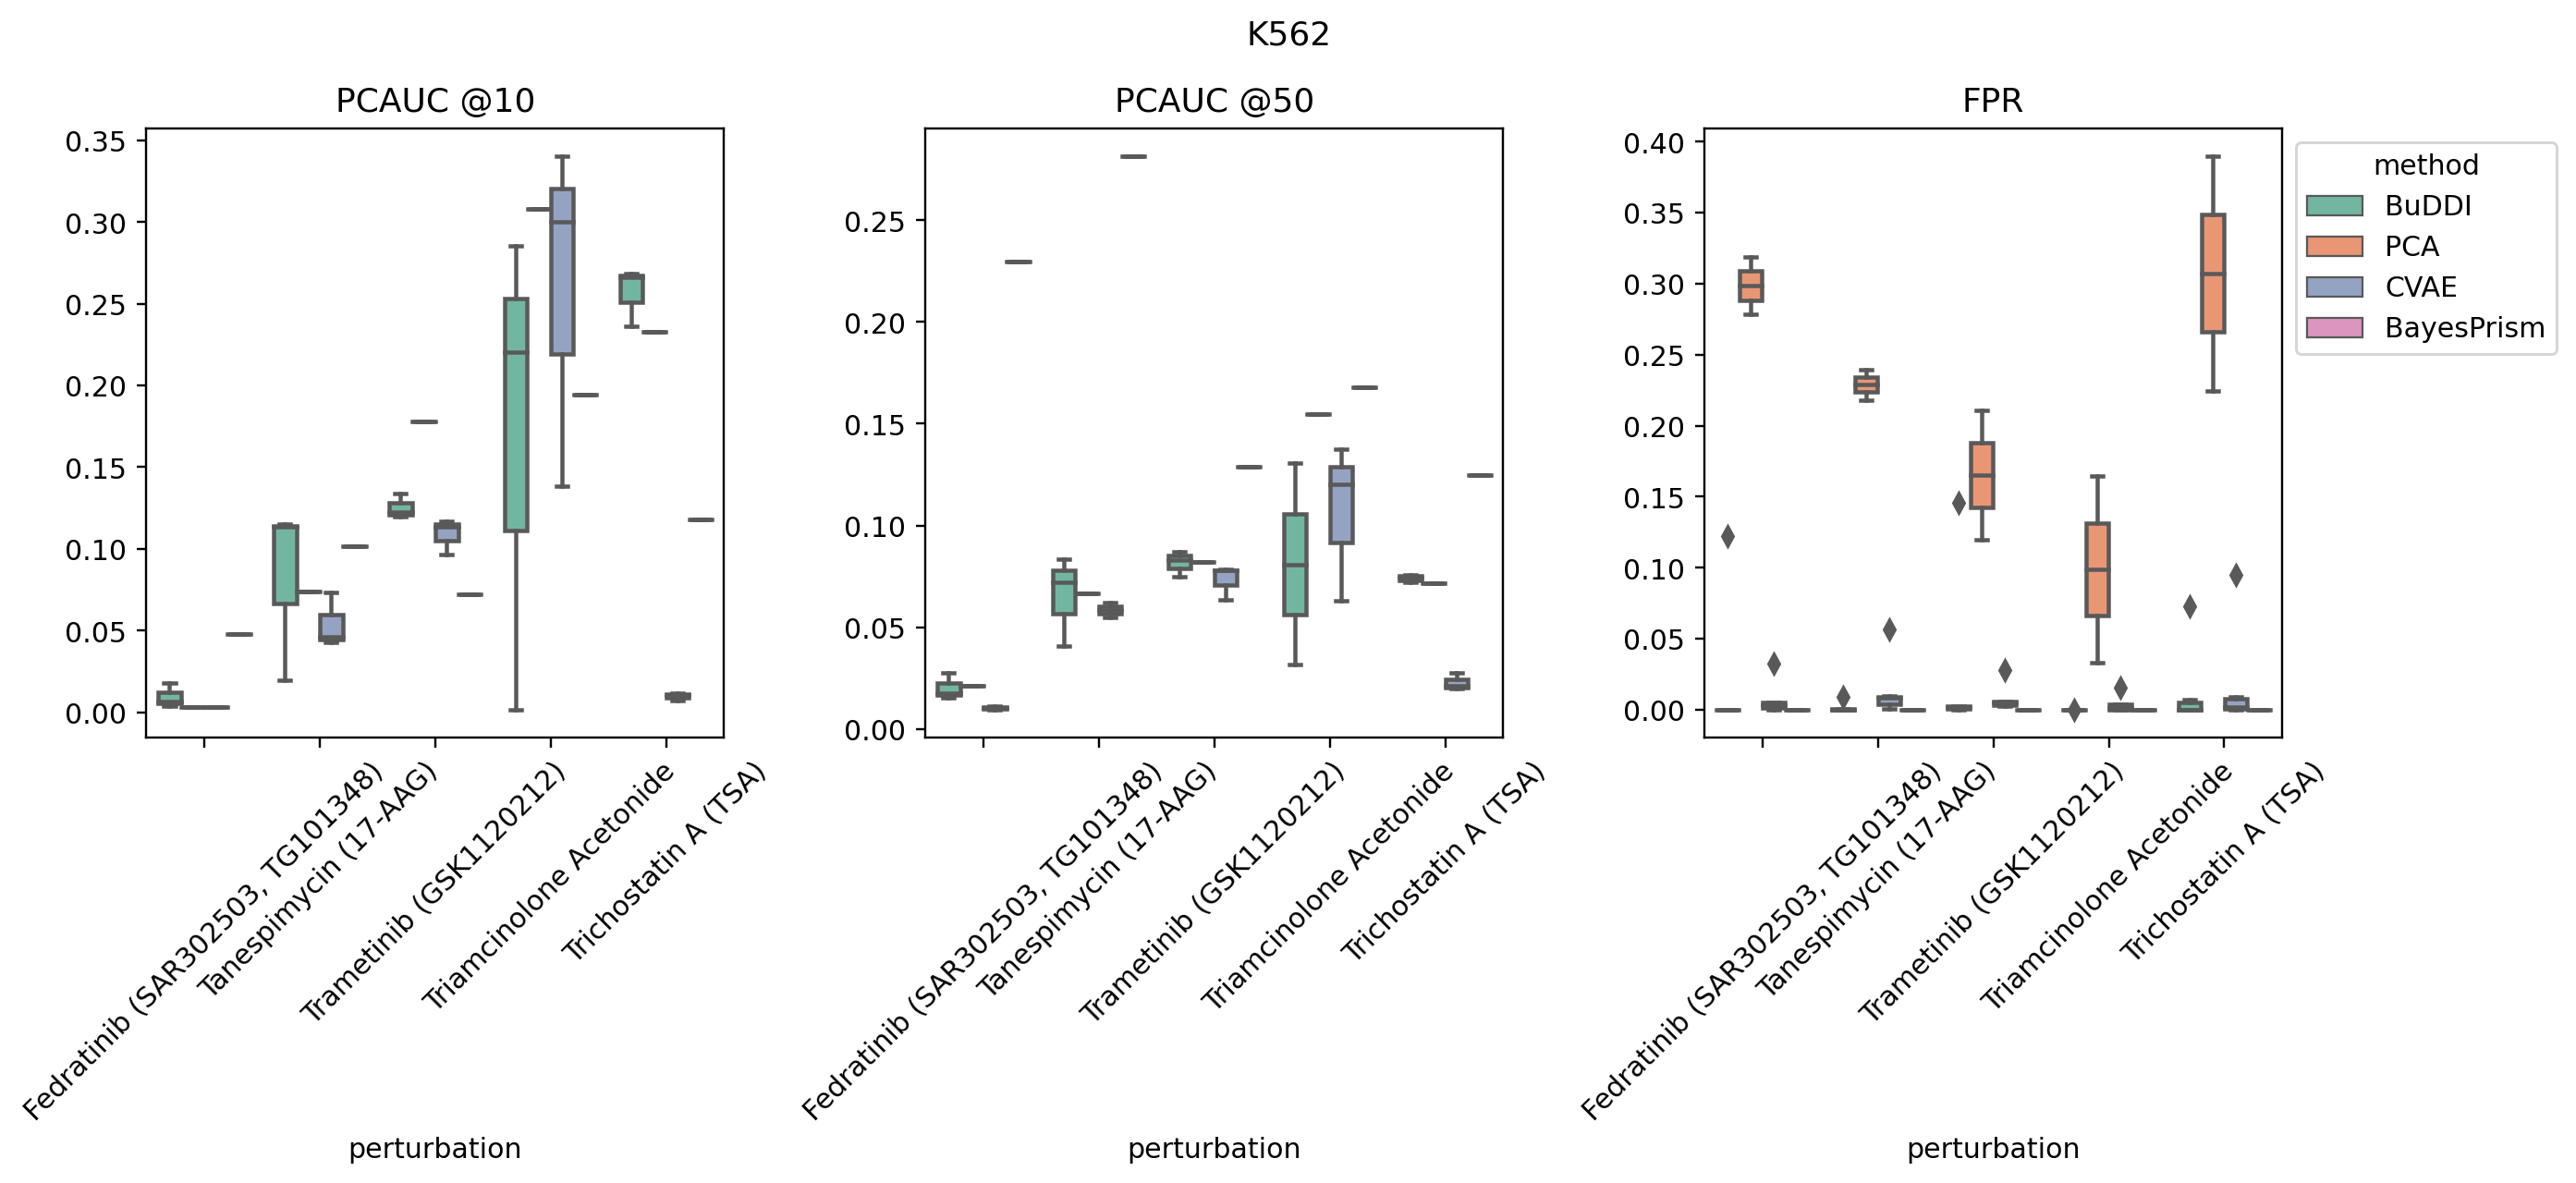

In [110]:
curr_plot_df = all_df.iloc[np.where(all_df.CellTypePerturbed == "K562")[0]]

# plot
fig, axs = plt.subplots(1, 3, figsize=(13,6), dpi=216)

sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 10))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[0])
axs[0].set_title("PCAUC @10")
axs[0].set(ylabel="PRAUC")
axs[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 50))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[1])
axs[1].set_title("PCAUC @50")
axs[1].set(ylabel="PRAUC")
axs[1].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where(curr_plot_df.metric == "FPR")[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[2])
axs[2].set_title("FPR")
axs[2].set(ylabel="FPR")
axs[2].tick_params(axis='x', rotation=45)



axs[0].get_legend().remove()
axs[1].get_legend().remove()
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1, 1))


y_axis = axs[0].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[1].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[2].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

fig.suptitle('K562') 
fig.show()
fig.tight_layout()



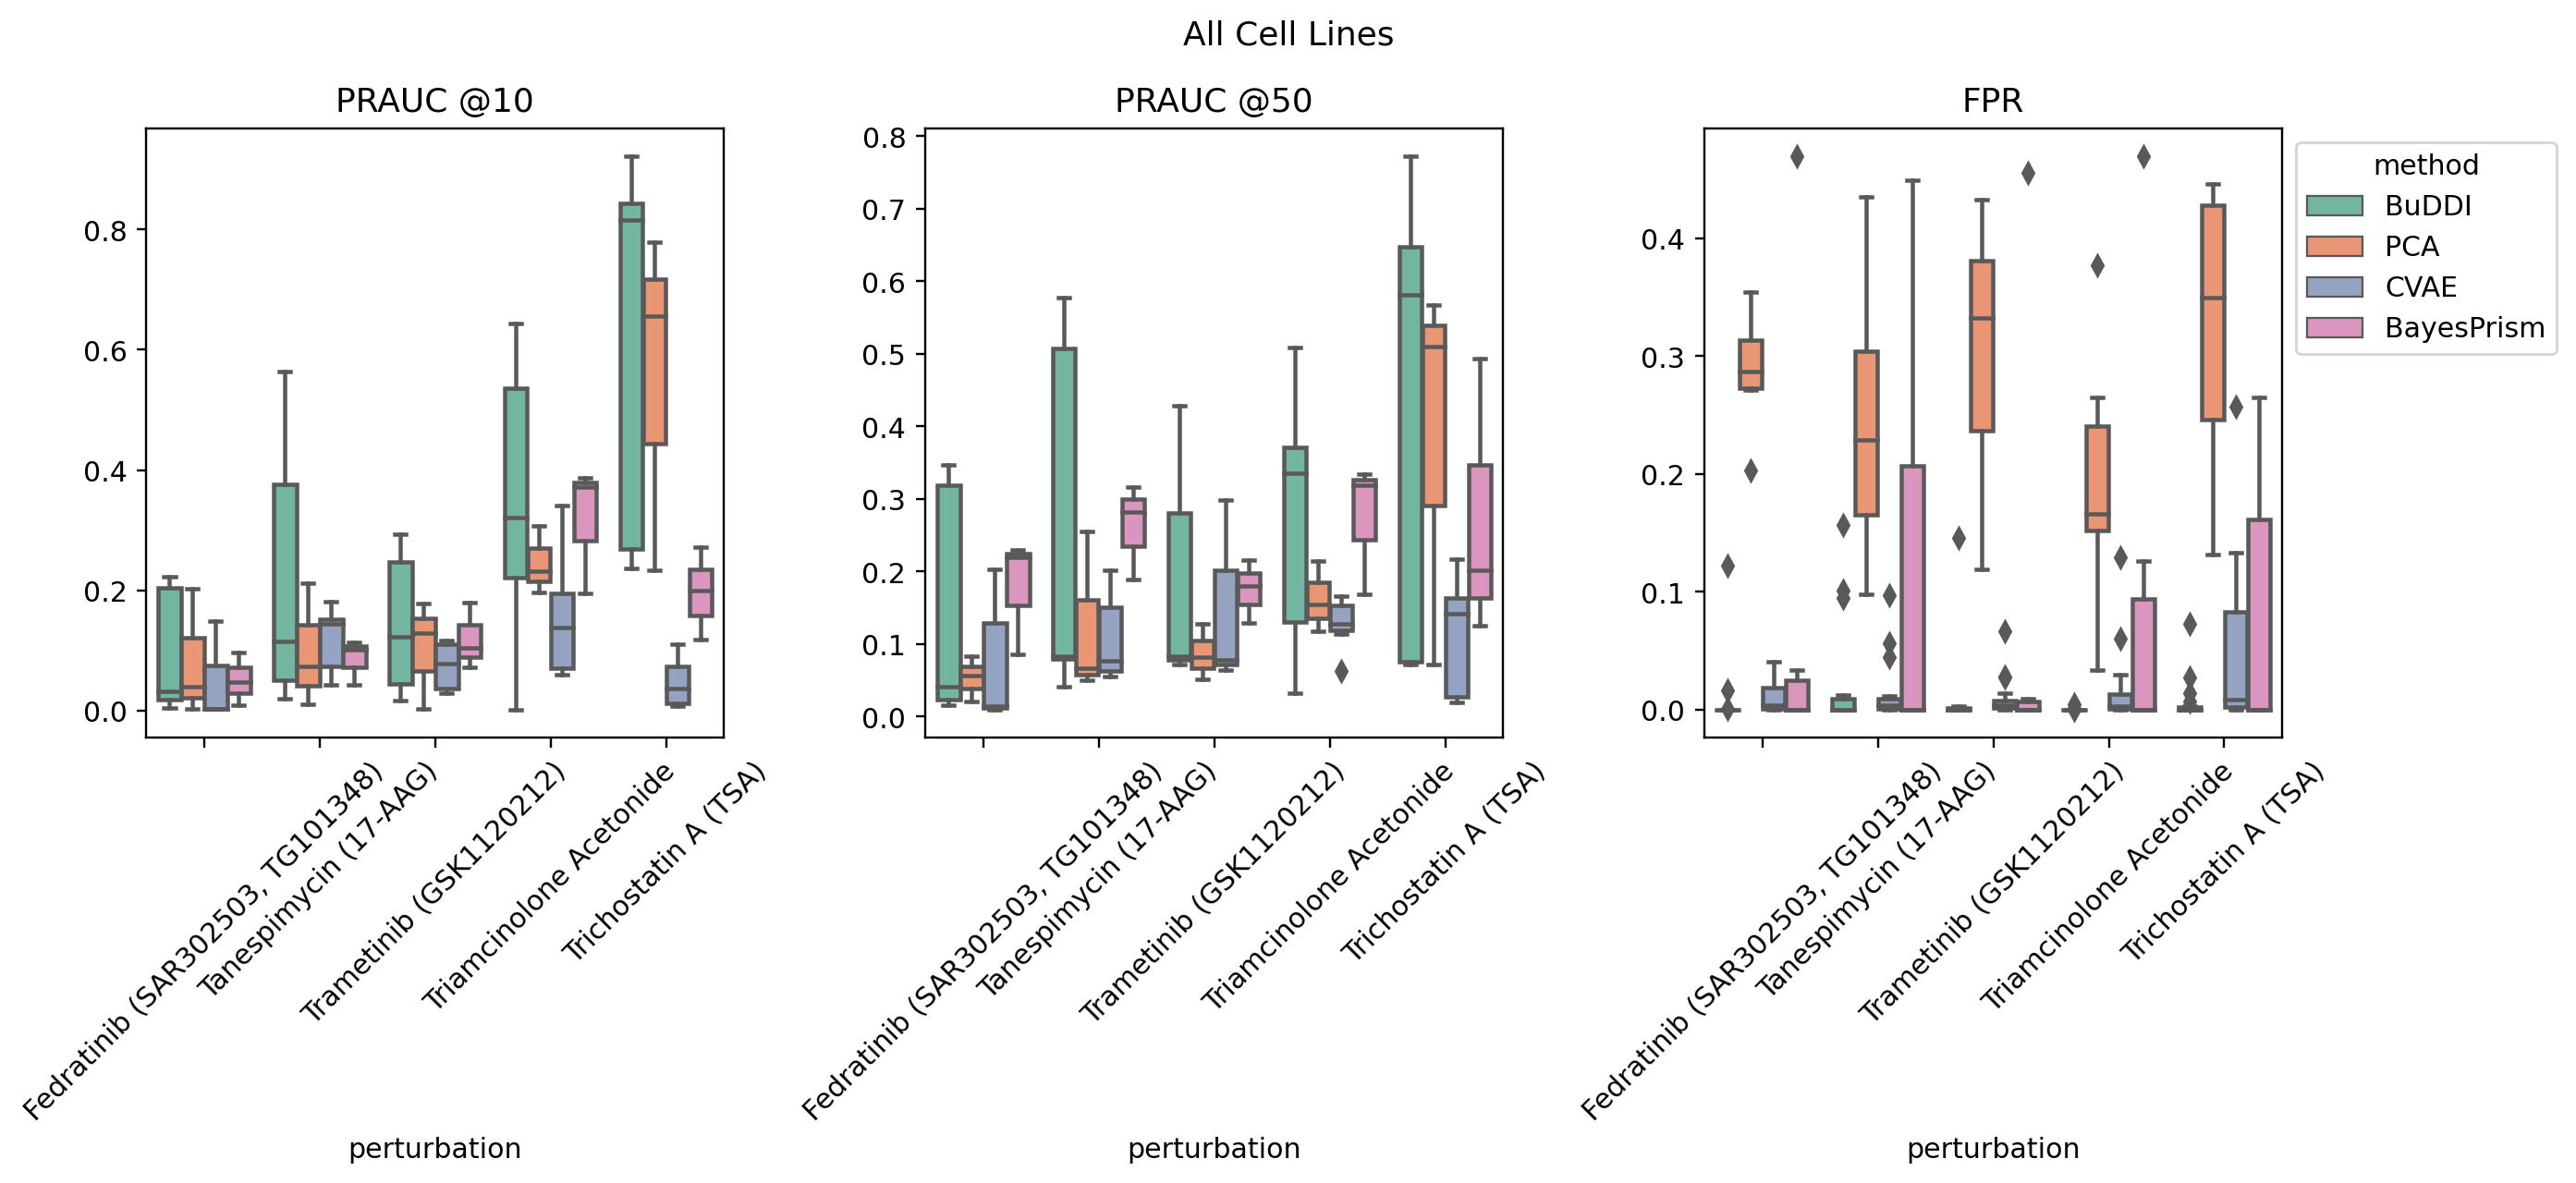

In [111]:
curr_plot_df = all_df

# plot
fig, axs = plt.subplots(1, 3, figsize=(13,6), dpi=216)

sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 10))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[0])
axs[0].set_title("PRAUC @10")
axs[0].set(ylabel="PRAUC")
axs[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where((curr_plot_df.metric == "avg_pr") & 
                                  (curr_plot_df.num_top == 50))[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[1])
axs[1].set_title("PRAUC @50")
axs[1].set(ylabel="PRAUC")
axs[1].tick_params(axis='x', rotation=45)


sns.boxplot(data=curr_plot_df.iloc[np.where(curr_plot_df.metric == "FPR")[0]], 
            x="perturbation", y="scores",
            hue="method", ax= axs[2])
axs[2].set_title("FPR")
axs[2].set(ylabel="FPR")
axs[2].tick_params(axis='x', rotation=45)



axs[0].get_legend().remove()
axs[1].get_legend().remove()
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1, 1))


y_axis = axs[0].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[1].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

y_axis = axs[2].axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

fig.suptitle('All Cell Lines') 
fig.show()
fig.tight_layout()

